In [1]:
%matplotlib inline

In [2]:
import numpy as np
import nibabel as nb
import scipy.stats as stats
import matplotlib.pyplot as plt
from nilearn.input_data import NiftiMasker
import seaborn as sns

### Load gradients and cell data

In [3]:
mask = nb.load('/home/julia/data/gradients/atlas/cortex/cortex_mask_25um_allen.nii.gz').get_data()

In [6]:
x = np.load('/home/julia/data/gradients/atlas/epfl_cell_atlas/x2vol.npy')
y = np.load('/home/julia/data/gradients/atlas/epfl_cell_atlas/y2vol.npy')
z = np.load('/home/julia/data/gradients/atlas/epfl_cell_atlas/z2vol.npy')
types = np.load('/home/julia/data/gradients/atlas/epfl_cell_atlas/types.npy')

Types probably:
0 - excitatory neurons;
1 - inhibitory neurons;
2 - oligodendrocytes;
3 - astrocytes;
4 - microglia;

### Make a cell density map

In [7]:
cell_density = np.zeros_like(mask)
for c in range(len(x)):
    voxel = (int(np.floor(x[c])), int(np.floor(y[c])), int(np.floor(z[c])))
    if not mask[voxel]==0:
        cell_density[voxel] +=  1

In [8]:
template_img = nb.load('/home/julia/data/gradients/atlas/allen_api/template.nii.gz')
aff = template_img.affine
hdr = template_img.header
nb.save(nb.Nifti1Image(cell_density, aff, hdr), 
        '/home/julia/data/gradients/atlas/epfl_cell_atlas/cortex_cells_25um.nii.gz')

### Smooth cell density map with same kernel as gradient

In [13]:
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img='/home/julia/data/gradients/atlas/cortex/cortex_mask_25um_allen.nii.gz', 
                     standardize=True, smoothing_fwhm=0.45)
smoothed_trans = masker.fit_transform('/home/julia/data/gradients/atlas/epfl_cell_atlas/cortex_cells_25um.nii.gz')

/home/julia/workspace/nilearn/nilearn/signal.py:61: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '


In [14]:
smoothed = masker.inverse_transform(smoothed_trans)
smoothed.to_filename('/home/julia/data/gradients/atlas/epfl_cell_atlas/cortex_cells_25um_smooth045.nii.gz')
cell_density = smoothed.get_data().squeeze()

### Calcluate Spearman correlation to gradients

In [15]:
for g in range(6):
    gradient = nb.load('/home/julia/data/gradients/results/gradient000%s_highres_allen.nii.gz' %str(g)).get_data()
    print('Gradient %i:' %g, stats.spearmanr(cell_density[mask==1], gradient[mask==1]))

Gradient 0: SpearmanrResult(correlation=-0.17271282932472504, pvalue=0.0)
Gradient 1: SpearmanrResult(correlation=-0.042193089143407386, pvalue=0.0)
Gradient 2: SpearmanrResult(correlation=0.03659118603023953, pvalue=0.0)
Gradient 3: SpearmanrResult(correlation=0.04396383837545526, pvalue=0.0)
Gradient 4: SpearmanrResult(correlation=-0.1610540251965485, pvalue=0.0)
Gradient 5: SpearmanrResult(correlation=-0.02105099194455267, pvalue=0.0)


### Plot

In [18]:
template = template_img.get_data()

In [19]:
cell_density[mask==0] = np.nan
gradient_0 = nb.load('/home/julia/data/gradients/results/gradient0000_highres_allen.nii.gz').get_data()
gradient_0[mask==0] = np.nan
gradient_4 = nb.load('/home/julia/data/gradients/results/gradient0004_highres_allen.nii.gz').get_data()
gradient_4[mask==0] = np.nan

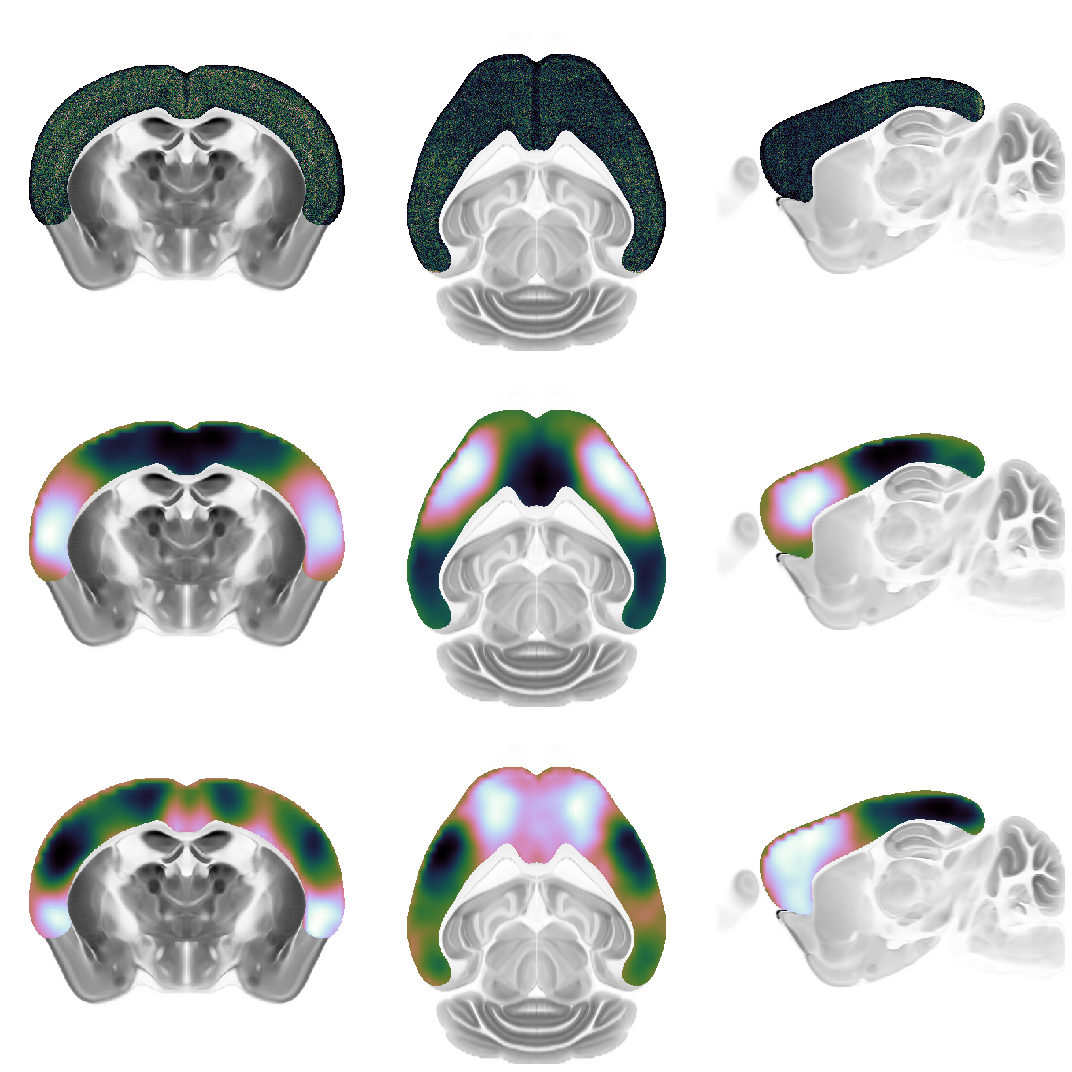

In [20]:
x=250
y=100
z=150

fig = plt.figure(figsize=(15,15))

fig.add_subplot(3,3,1)
plt.imshow(template[x,:,:],  cmap='Greys', aspect='equal');
plt.imshow(cell_density[x,:,:],  cmap="cubehelix", aspect='equal');
plt.axis('off');

fig.add_subplot(3,3,2)
plt.imshow(template[:,y,:],  cmap='Greys', aspect='equal');
plt.imshow(cell_density[:,y,:],  cmap="cubehelix", aspect='equal');
plt.axis('off');

fig.add_subplot(3,3,3)
plt.imshow(template[:,:,z].T,  cmap='Greys', aspect='equal');
plt.imshow(cell_density[:,:,z].T,  cmap="cubehelix", aspect='equal');
plt.axis('off');

fig.add_subplot(3,3,4)
plt.imshow(template[x,:,:],  cmap='Greys', aspect='equal');
plt.imshow(gradient_0[x,:,:],  cmap="cubehelix", aspect='equal');
plt.axis('off');

fig.add_subplot(3,3,5)
plt.imshow(template[:,y,:],  cmap='Greys', aspect='equal');
plt.imshow(gradient_0[:,y,:],  cmap="cubehelix", aspect='equal');
plt.axis('off');

fig.add_subplot(3,3,6)
plt.imshow(template[:,:,z].T,  cmap='Greys', aspect='equal');
plt.imshow(gradient_0[:,:,z].T,  cmap="cubehelix", aspect='equal');
plt.axis('off');

fig.add_subplot(3,3,7)
plt.imshow(template[x,:,:],  cmap='Greys', aspect='equal');
plt.imshow(gradient_4[x,:,:],  cmap="cubehelix", aspect='equal');
plt.axis('off');

fig.add_subplot(3,3,8)
plt.imshow(template[:,y,:],  cmap='Greys', aspect='equal');
plt.imshow(gradient_4[:,y,:],  cmap="cubehelix", aspect='equal');
plt.axis('off');

fig.add_subplot(3,3,9)
plt.imshow(template[:,:,z].T,  cmap='Greys', aspect='equal');
plt.imshow(gradient_4[:,:,z].T,  cmap="cubehelix", aspect='equal');
plt.axis('off');

plt.tight_layout()

In [5]:
x = np.load('/home/julia/data/gradients/atlas/epfl_cell_atlas/x2jo.npy')
y = np.load('/home/julia/data/gradients/atlas/epfl_cell_atlas/y2jo.npy')
z = np.load('/home/julia/data/gradients/atlas/epfl_cell_atlas/z2jo.npy')

In [6]:
jo_lowres = nb.load('/home/julia/data/gradients/atlas/200um/ABI_template_200um.nii')

In [7]:
lowres = jo_lowres.get_data()

In [9]:
def highres2lowres(x, y, z, factor=8):
    return x/factor, y/factor, z/factor

In [10]:
x, y, z = highres2lowres(x,y,z)

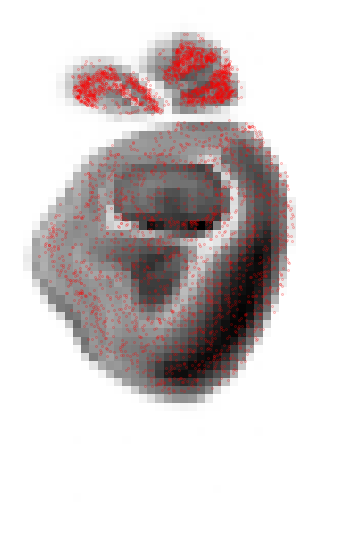

In [38]:
x_slice = 10
x_idx = np.where(np.abs(x-x_slice)<0.001)
sns.set_context('poster')
fig = plt.figure(figsize=(10,10))
plt.imshow(lowres[x_slice,:,:],  cmap='Greys', aspect='equal');
plt.scatter(z[x_idx], y[x_idx]-1, marker='.', color='red', s=1, alpha=0.5);
plt.axis('off');